In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:
# Load the dataset (change path accordingly after downloading)
df = pd.read_csv("Mall_Customers.csv")

# Preview
print(df.head())
print(df.info())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print(df.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


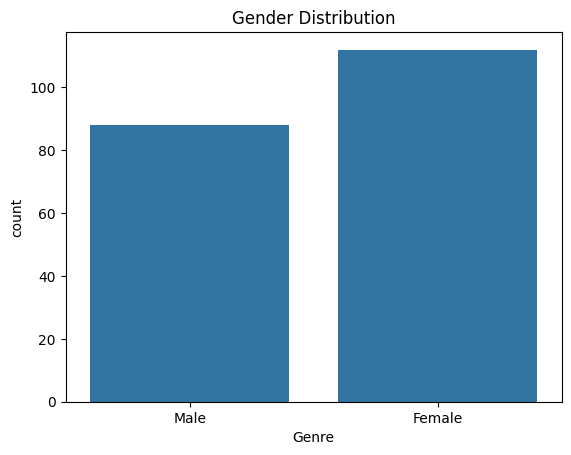

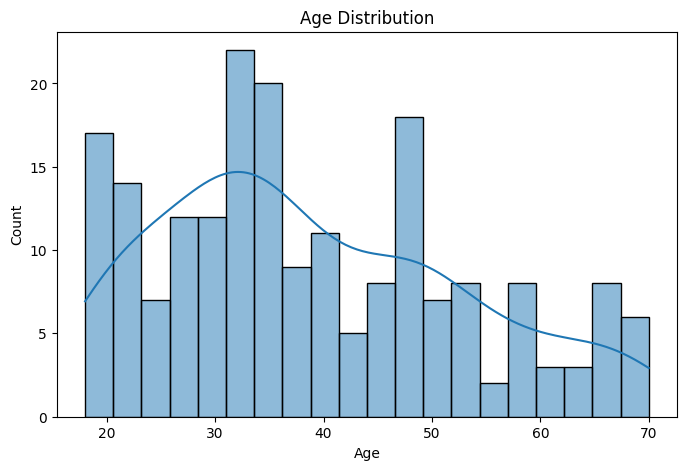

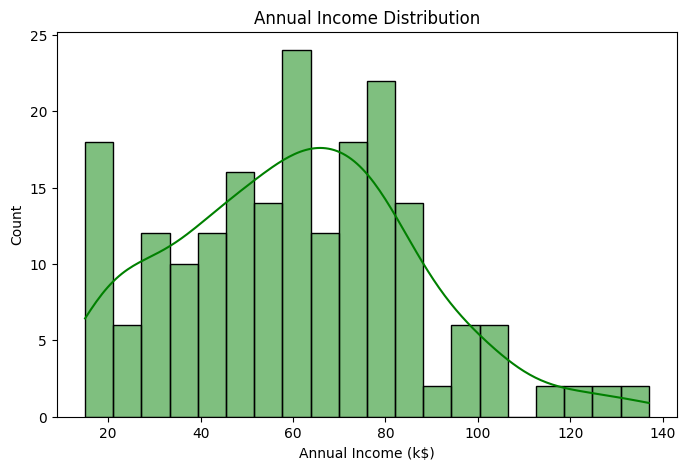

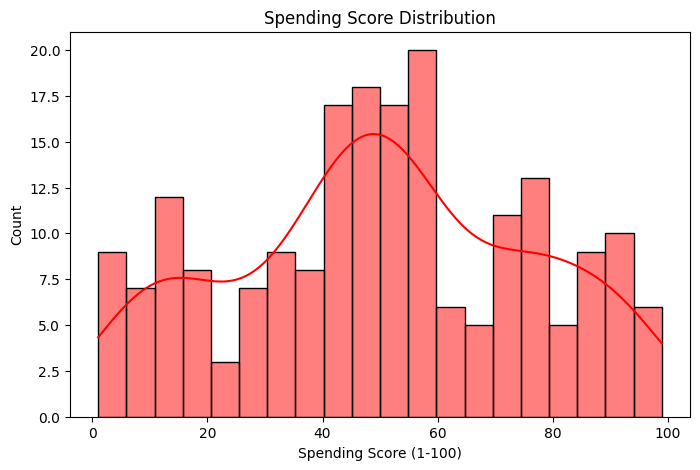

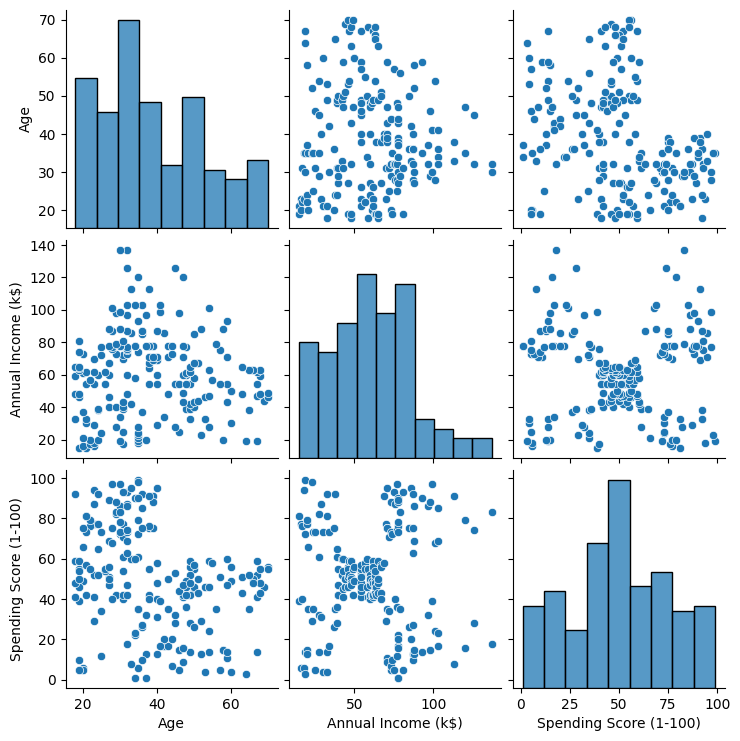

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender (Genre) distribution
sns.countplot(x="Genre", data=df)
plt.title("Gender Distribution")
plt.show()

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Annual Income distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="green")
plt.title("Annual Income Distribution")
plt.show()

# Spending Score distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="red")
plt.title("Spending Score Distribution")
plt.show()

# Pairplot for Age, Income, Spending
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.show()


In [ ]:
# Features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Standardization (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Standardization (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


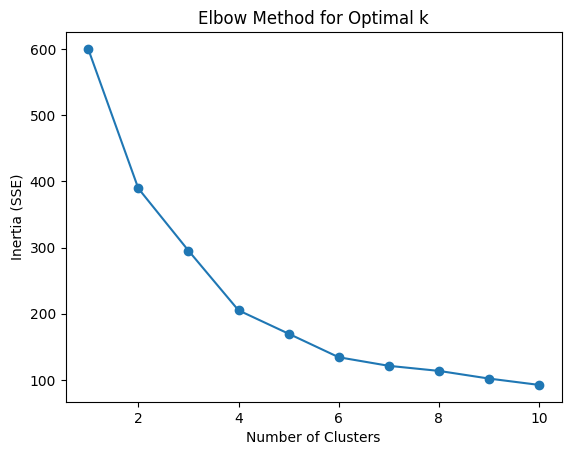

In [ ]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:
# Suppose elbow suggests k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Cluster centers (in scaled space)
print(kmeans.cluster_centers_)


[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


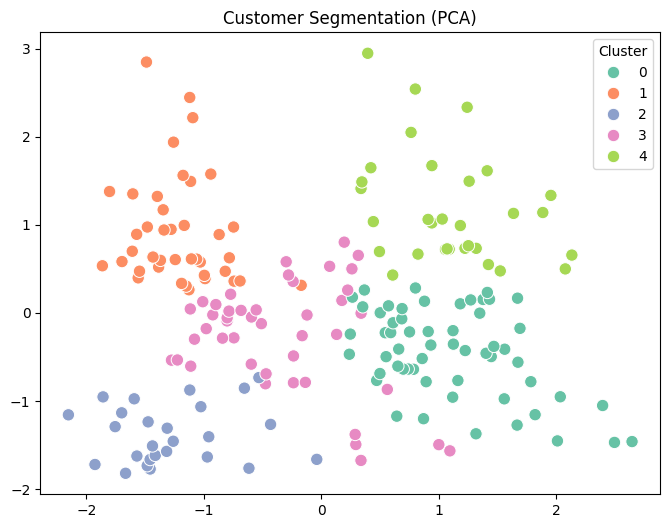

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set2", s=80)
plt.title("Customer Segmentation (PCA)")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


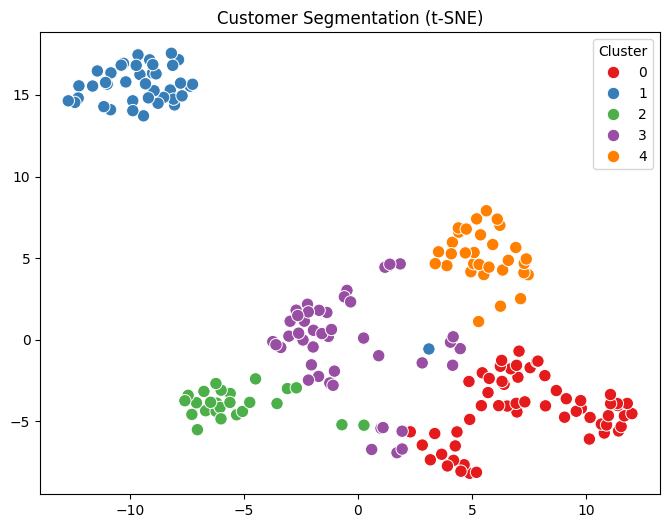

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df["Cluster"], palette="Set1", s=80)
plt.title("Customer Segmentation (t-SNE)")
plt.show()


In [ ]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Genre"]].mean(numeric_only=True)
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871
